# Off-Facebook Analysis Report (part 2)
## Delaney Curran
### 11/21/2022

The two albums I chose to compare were the soundtrack of Black Panther and Black Panther: Wakanda Forever. I chose these two movies because they are some of my favorites and the new Black Panther: Wakanda Forever just came out. I think it would be interesting to see if these movies have similar soundtracks.

In [2]:
import pandas as pd
import json
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
keys = pd.read_csv("Spotify.txt", header = 0, sep = ",")

In [4]:
appid = keys['client_id'][0]

In [5]:
appsecret = keys['Client_secret'][0]

In [6]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [7]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [8]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [9]:
response = requests.post(access_token_url, headers = header, data = payload)

In [10]:
session_token = response.json()['access_token']

In [11]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [12]:
black_panther2_id = '06RK0wX4GqHcxBtHlVoGH5'

In [13]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(black_panther2_id)

In [14]:
black_panther2_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [15]:
black_panther2_tracks.status_code

200

In [16]:
black_panther2_dict = json.loads(black_panther2_tracks.text)

In [17]:
black_panther2_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [18]:
black_panther2_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [19]:
black_panther2_track_ids = [x['id'] for x in black_panther2_dict['items']]

In [ ]:
black_panther2_track_ids

In [ ]:
black_panther2_track_strings = ','.join(str(x) for x in black_panther2_track_ids)
black_panther2_track_strings

In [22]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(black_panther2_track_strings)

In [23]:
black_panther2_features = requests.get(track_features_endpoint, headers = session_header)

In [ ]:
black_panther2_features.status_code

In [25]:
black_panther2_dict = json.loads(black_panther2_features.text)

In [ ]:
black_panther2_dict.keys()

In [ ]:
black_panther2_dict['audio_features'][0]

In [28]:
black_panther2_df = pd.DataFrame(black_panther2_dict['audio_features'])

In [ ]:
black_panther2_df

In [ ]:
black_panther1_id = '3pLdWdkj83EYfDN6H2N8MR'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(black_panther1_id)
black_panther1_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(black_panther1_tracks.status_code)
black_panther1_dict = json.loads(black_panther1_tracks.text)
black_panther1_track_ids = [x['id'] for x in black_panther1_dict['items']]
black_panther1_track_strings = ','.join(str(x) for x in black_panther1_track_ids)
print(black_panther1_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(black_panther1_track_strings)

In [31]:
black_panther1_features = requests.get(track_features_endpoint, headers = session_header)
black_panther1_features.status_code

200

In [ ]:
black_panther1_dict = json.loads(black_panther1_features.text)
black_panther1_dict['audio_features'][0]

In [ ]:
black_panther1_df = pd.DataFrame(black_panther1_dict['audio_features'])

In [ ]:
black_panther1_df

In [36]:
black_panther2_df['album'] = ['black_panther2'] * len(black_panther2_df.index)

In [37]:
black_panther1_df['album'] = ['black_panther1'] * len(black_panther1_df.index)

In [38]:
audio_features = pd.concat([black_panther2_df, black_panther1_df])

In [39]:
audio_features.to_csv('audio_features_bp.csv')

In [40]:
audio = pd.read_csv('audio_features_bp.csv', sep = ',')

In [ ]:
audio

I chose to compare energy and speechiness for these albums. I chose these categories because it is a Soundtrack for a action movie. I think it would be interesting to see if a movie soundtrack has high or low speechiness. I chose energy because these are action movies with intense scenes so I would guess that the energy is high.

In [ ]:
audio[audio['album'] == 'black_panther2']['energy']

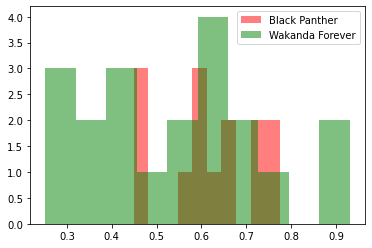

In [61]:
fig5, ax5 = plt.subplots()


bp1 = audio[audio['album'] == 'black_panther1']['energy']
bp2= audio[audio['album'] == 'black_panther2']['energy']
ax5.hist(bp1, alpha = 0.5, color = 'red', label = 'Black Panther')
ax5.hist(bp2, alpha = 0.5, color = 'green', label = 'Wakanda Forever')
ax5.legend()
plt.show()

From this chart we can see that energy is very spread out. There are a few songs with very high energy and a few songs with very low energy.

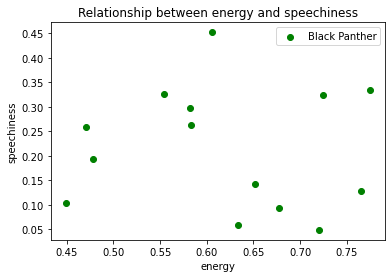

In [50]:
fig1, ax1 = plt.subplots()
bp1 = audio[audio['album'] == 'black_panther1']
ax1.scatter(bp1['energy'], bp1['speechiness'], label = 'Black Panther', color = 'green')
ax1.set_xlabel('energy')
ax1.set_ylabel('speechiness')
ax1.set_title('Relationship between energy and speechiness')
ax1.legend()
plt.show()

Based on this scatterplot we can see the relationship between energy and speechiness. As we can see from this scatterplot the speechiness Is fairly low across the board. We can also see that there is almost no correlation between energy and speechiness.

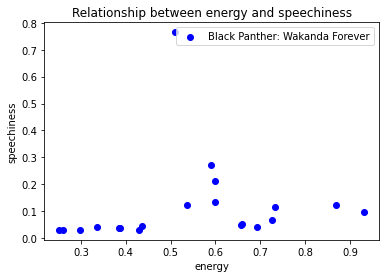

In [55]:
fig2, ax2 = plt.subplots()
bp2 = audio[audio['album'] == 'black_panther2']
ax2.scatter(bp2['energy'], bp2['speechiness'], label = 'Black Panther: Wakanda Forever', color = 'blue')
ax2.set_xlabel('energy')
ax2.set_ylabel('speechiness')
ax2.set_title('Relationship between energy and speechiness')
ax2.legend()
plt.show()

In this scatterplot for Black Panther: Wakanda forever I we can see that once again there is almost no correlation between speechiness And energy. However there is one song on the soundtrack that has very high speechiness.

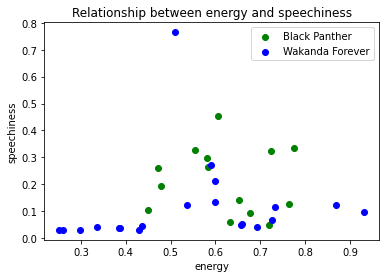

In [56]:
fig3, ax3 = plt.subplots()
bp1 = audio[audio['album'] == 'black_panther1']
bp2 = audio[audio['album'] == 'black_panther2']
ax3.scatter(bp1['energy'], bp1['speechiness'], label = 'Black Panther', color = 'green')
ax3.scatter(bp2['energy'], bp2['speechiness'], label = 'Wakanda Forever', color = 'blue')
ax3.set_xlabel('energy')
ax3.set_ylabel('speechiness')
ax3.set_title('Relationship between energy and speechiness')
ax3.legend()
plt.show()

In this scatterplot there is More of a correlation than the other two. However this correlation is still very low but is slightly positive.

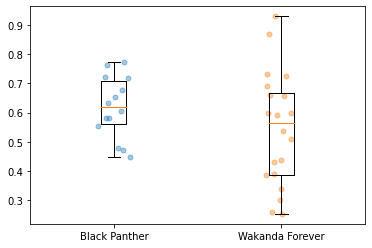

In [59]:
fig4, ax4 = plt.subplots()
bp1_eng = audio[audio['album'] == 'black_panther1']['energy']
bp2_eng = audio[audio['album'] == 'black_panther2']['energy']
bp1_x = [1] * len(bp1_eng)
bp2_x = [2] * len(bp2_eng)
bp1_x_jitter = np.random.uniform(-0.10, .10, len(bp1_x))
bp2_x_jitter = np.random.uniform(-0.10, .10, len(bp2_x))

ax4.scatter(bp1_x + bp1_x_jitter, bp1_eng, alpha = 0.4, s = 25)
ax4.scatter(bp2_x + bp2_x_jitter, bp2_eng, alpha = 0.4, s = 25)
ax4.set_xlim(.5, 2.5)
#fig4.set_figheight(10)
ax4.boxplot([bp1_eng, bp2_eng])
ax4.set_xticks([1,2], ['Black Panther', 'Wakanda Forever'])
plt.show()

In this box plot we can see that the energy for the first black panther is in a lot smaller range while Black Panther: Wakanda forever spreads across the whole range. We can conclude from this box plot that I the first black panther has a lot more similar energy songs while Black Panther Wakanda forever has songs from a wide range of energy. 

In [60]:
stats.ttest_ind(audio['energy'], audio['speechiness'] )

Ttest_indResult(statistic=10.649590613005946, pvalue=5.67784988421502e-16)

We can see that the P value is 5.67784988421502e-16 meaning that this is satistically significant. 